In [1]:
import numpy as np
from scipy.io import loadmat,savemat

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = loadmat("test_corr_data.mat")
data.keys()

dict_keys(['rho_wt', 'ages', 'regions', '__version__', 'p_wt', 'ps', 'Z_wt', 'labels', 'Zs', '__header__', '__globals__', 'rhos'])

In [20]:
Z_wt = data["Z_wt"]
rho_wt = data["rho_wt"]
p_wt = data["p_wt"]

Z_wt[np.isnan(Z_wt)] = 0

r = 0
a = 0
Z = data["Zs"][r,a]
rho = data["rhos"][r,a]
p = data["ps"][r,a]

Z[np.isnan(Z)] = 0

In [47]:
labels = data["labels"]
assays = [l[0].split("_")[0] for l in labels[0]]
assay_names = np.unique(assays)
num_assays = len(assay_names)

pal = sns.husl_palette(num_assays, s=.45)
pal = {a:p for a,p in zip(assay_names,pal)}
colors = [pal[assay] for assay in assays]

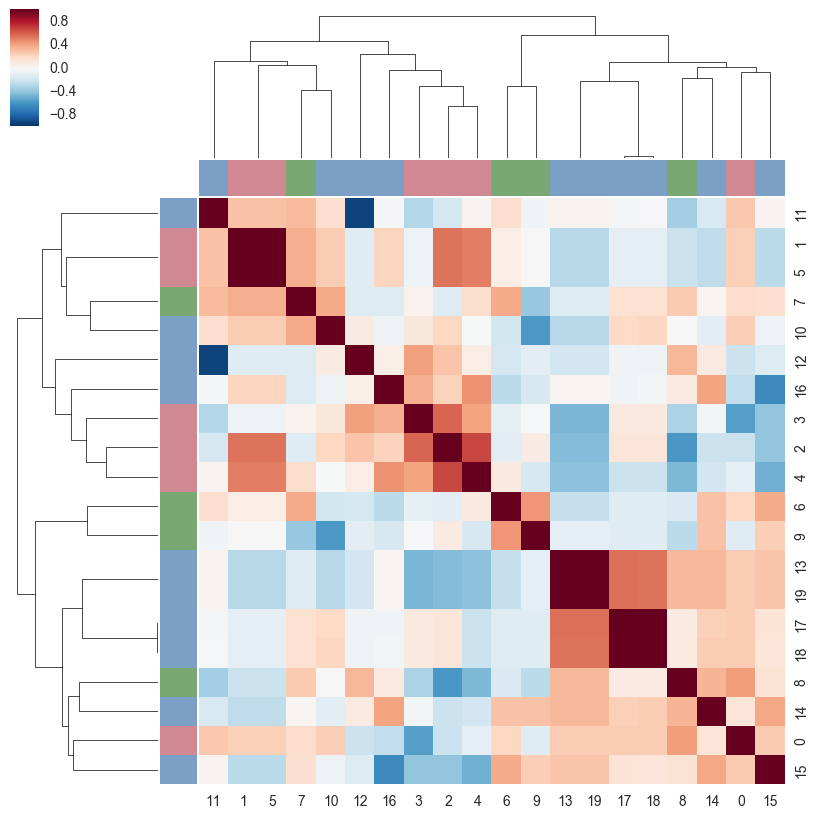

In [54]:
# Z_wt[np.isnan(Z_wt)] = 0
plt.figure()
# h = sns.clustermap(rho - rho_wt,row_colors=colors,col_colors=colors)
h = sns.clustermap(rho_wt,row_colors=colors,col_colors=colors)
# h = sns.clustermap(np.abs(rho_wt),row_colors=colors,col_colors=colors)
plt.show()